Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import shutil
import tqdm.auto as tqdm
import os

Access data from github

In [ ]:
!git clone https://github.com/huongntt309/INT3404E_20_ImageProcessing_Group3

Cloning into 'INT3404E_20_ImageProcessing_Group3'...
remote: Enumerating objects: 493, done.
remote: Counting objects: 100% (493/493), done.
remote: Compressing objects: 100% (472/472), done.
remote: Total 493 (delta 25), reused 474 (delta 13), pack-reused 0
Receiving objects: 100% (493/493), 38.97 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [ ]:
# Define the source and destination directories
src_dir = '/content/INT3404E_20_ImageProcessing_Group3/wb_localization_dataset'
dst_dir = '/content/wb_localization_dataset'

# Copy the child directory to content
shutil.copytree(src_dir, dst_dir)

# Remove the parent directory
shutil.rmtree('/content/INT3404E_20_ImageProcessing_Group3')

# Clone YOLO repo and install requirements

In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone repo
!pip install -U -r /content/yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16575, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 16575 (delta 28), reused 37 (delta 18), pack-reused 16522
Receiving objects: 100% (16575/16575), 15.10 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (11385/11385), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.5 MB/s eta 0:00:00
  

# Setup

Hyperparameters

In [ ]:
yaml_hyper_content = """
lr0: 0.005 # initial learning rate
lrf: 0.01 # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937 # SGD momentum/Adam beta1
weight_decay: 0.0005 # optimizer weight decay 5e-4
warmup_epochs: 3.0 # warmup epochs (fractions ok)
warmup_momentum: 0.8 # warmup initial momentum
warmup_bias_lr: 0.1 # warmup initial bias lr
box: 0.05 # box loss gain
cls: 0.5 # cls loss gain
cls_pw: 1.0 # cls BCELoss positive_weight
obj: 1.0 # obj loss gain (scale with pixels)
obj_pw: 1.0 # obj BCELoss positive_weight
iou_t: 0.20 # IoU training threshold
anchor_t: 4.0 # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0 # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015 # image HSV-Hue augmentation (fraction)
hsv_s: 0.7 # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4 # image HSV-Value augmentation (fraction)
degrees: 0.0 # image rotation (+/- deg)
translate: 0.1 # image translation (+/- fraction)
scale: 0.5 # image scale (+/- gain)
shear: 0.0 # image shear (+/- deg)
perspective: 0.0 # image perspective (+/- fraction), range 0-0.001
flipud: 0.0 # image flip up-down (probability)
fliplr: 0.5 # image flip left-right (probability)
mosaic: 1.0 # image mosaic (probability)
mixup: 0.0 # image mixup (probability)
copy_paste: 0.0 # segment copy-paste (probability)
"""

with open('custom_hyp.yaml', 'w') as f:
    f.write(yaml_hyper_content)

Dataset file

In [ ]:
yaml_data_content = """
train: /content/wb_localization_dataset/images/train
val: /content/wb_localization_dataset/images/val

# number of classes
nc: 1

# class names
names: ['']
"""

with open('custom_data.yaml', 'w') as f:
    f.write(yaml_data_content)

# Train model

In [ ]:
# training yolov5l model
# change path to avoid override
!python /content/yolov5/train.py --img 800 --batch 3 --epochs 60 \
  --data /content/custom_data.yaml \
  --cfg /content/yolov5/models/yolov5l.yaml \
  --weights yolov5l.pt --name yolov5l --hyp /content/custom_hyp.yaml --cache

2024-05-03 01:31:14.682013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 01:31:14.682065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 01:31:14.788221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5l.pt, cfg=/content/yolov5/models/yolov5l.yaml, data=/content/custom_data.yaml, hyp=/content/custom_hyp.yaml, epochs=60, batch_size=3, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, d

In [ ]:
# training yolov5x model
# change path to avoid override
!python /content/yolov5/train.py --img 800 --batch 3 --epochs 60 \
  --data /content/custom_data.yaml \
  --cfg /content/yolov5/models/yolov5x.yaml \
  --weights yolov5x.pt --name yolov5x --hyp /content/custom_hyp.yaml --cache

2024-05-03 01:42:15.707290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 01:42:15.707331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 01:42:15.714642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x.pt, cfg=/content/yolov5/models/yolov5x.yaml, data=/content/custom_data.yaml, hyp=/content/custom_hyp.yaml, epochs=60, batch_size=3, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, d

Ảnh gốc và nhãn tương ứng:


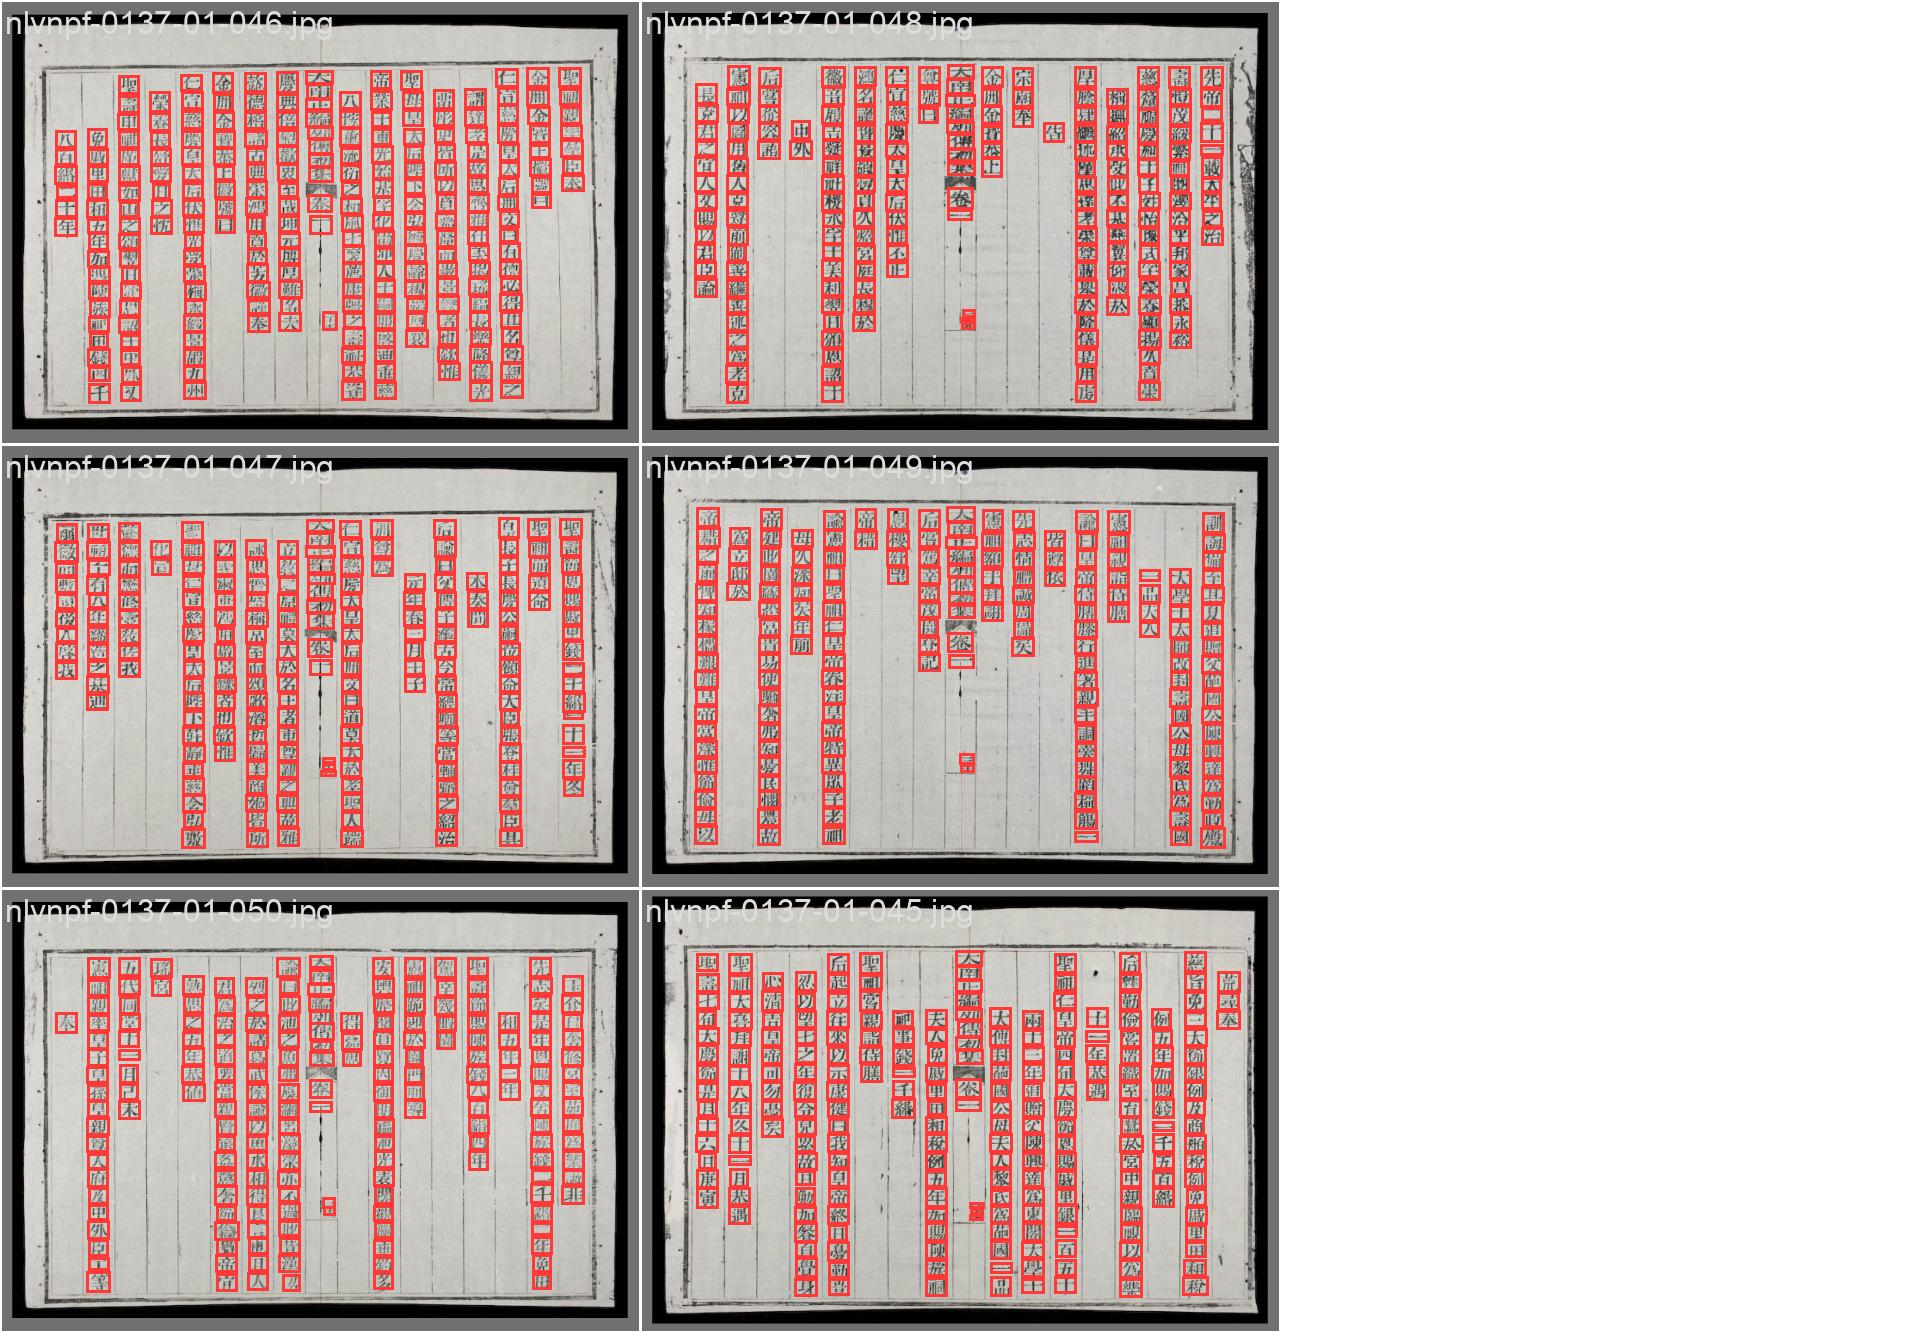

In [ ]:
from IPython.display import Image, display

print("Ảnh gốc và nhãn tương ứng:")
Image(filename='/content/yolov5/runs/train/yolov5l/val_batch0_labels.jpg', width=800)

Ảnh tăng cường (augmented)


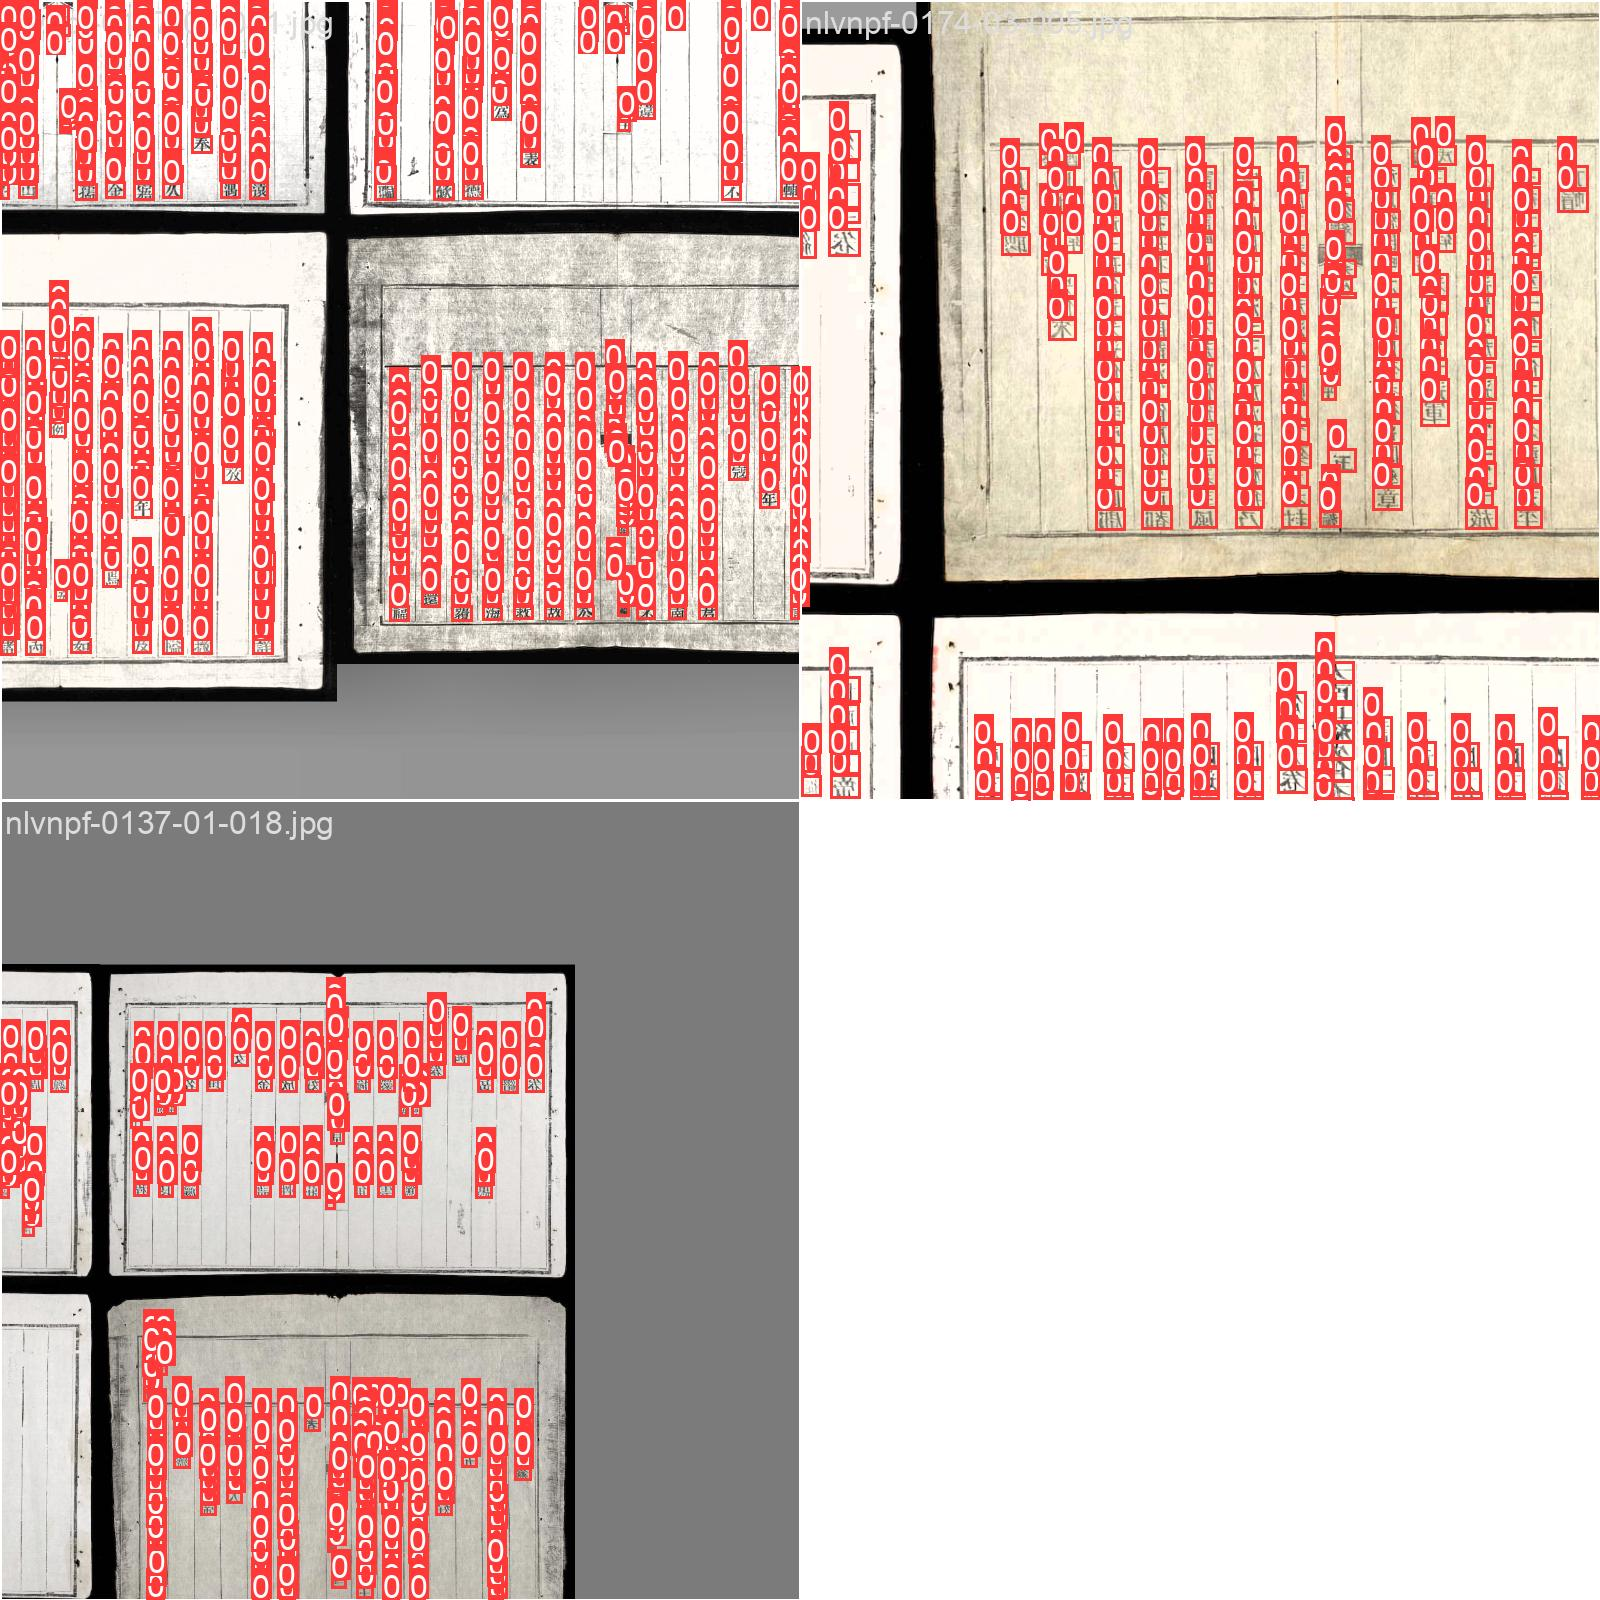

In [ ]:
print("Ảnh tăng cường (augmented)")
Image(filename='/content/yolov5/runs/train/yolov5l/train_batch1.jpg', width=800)

Train result of YOLOv5l:


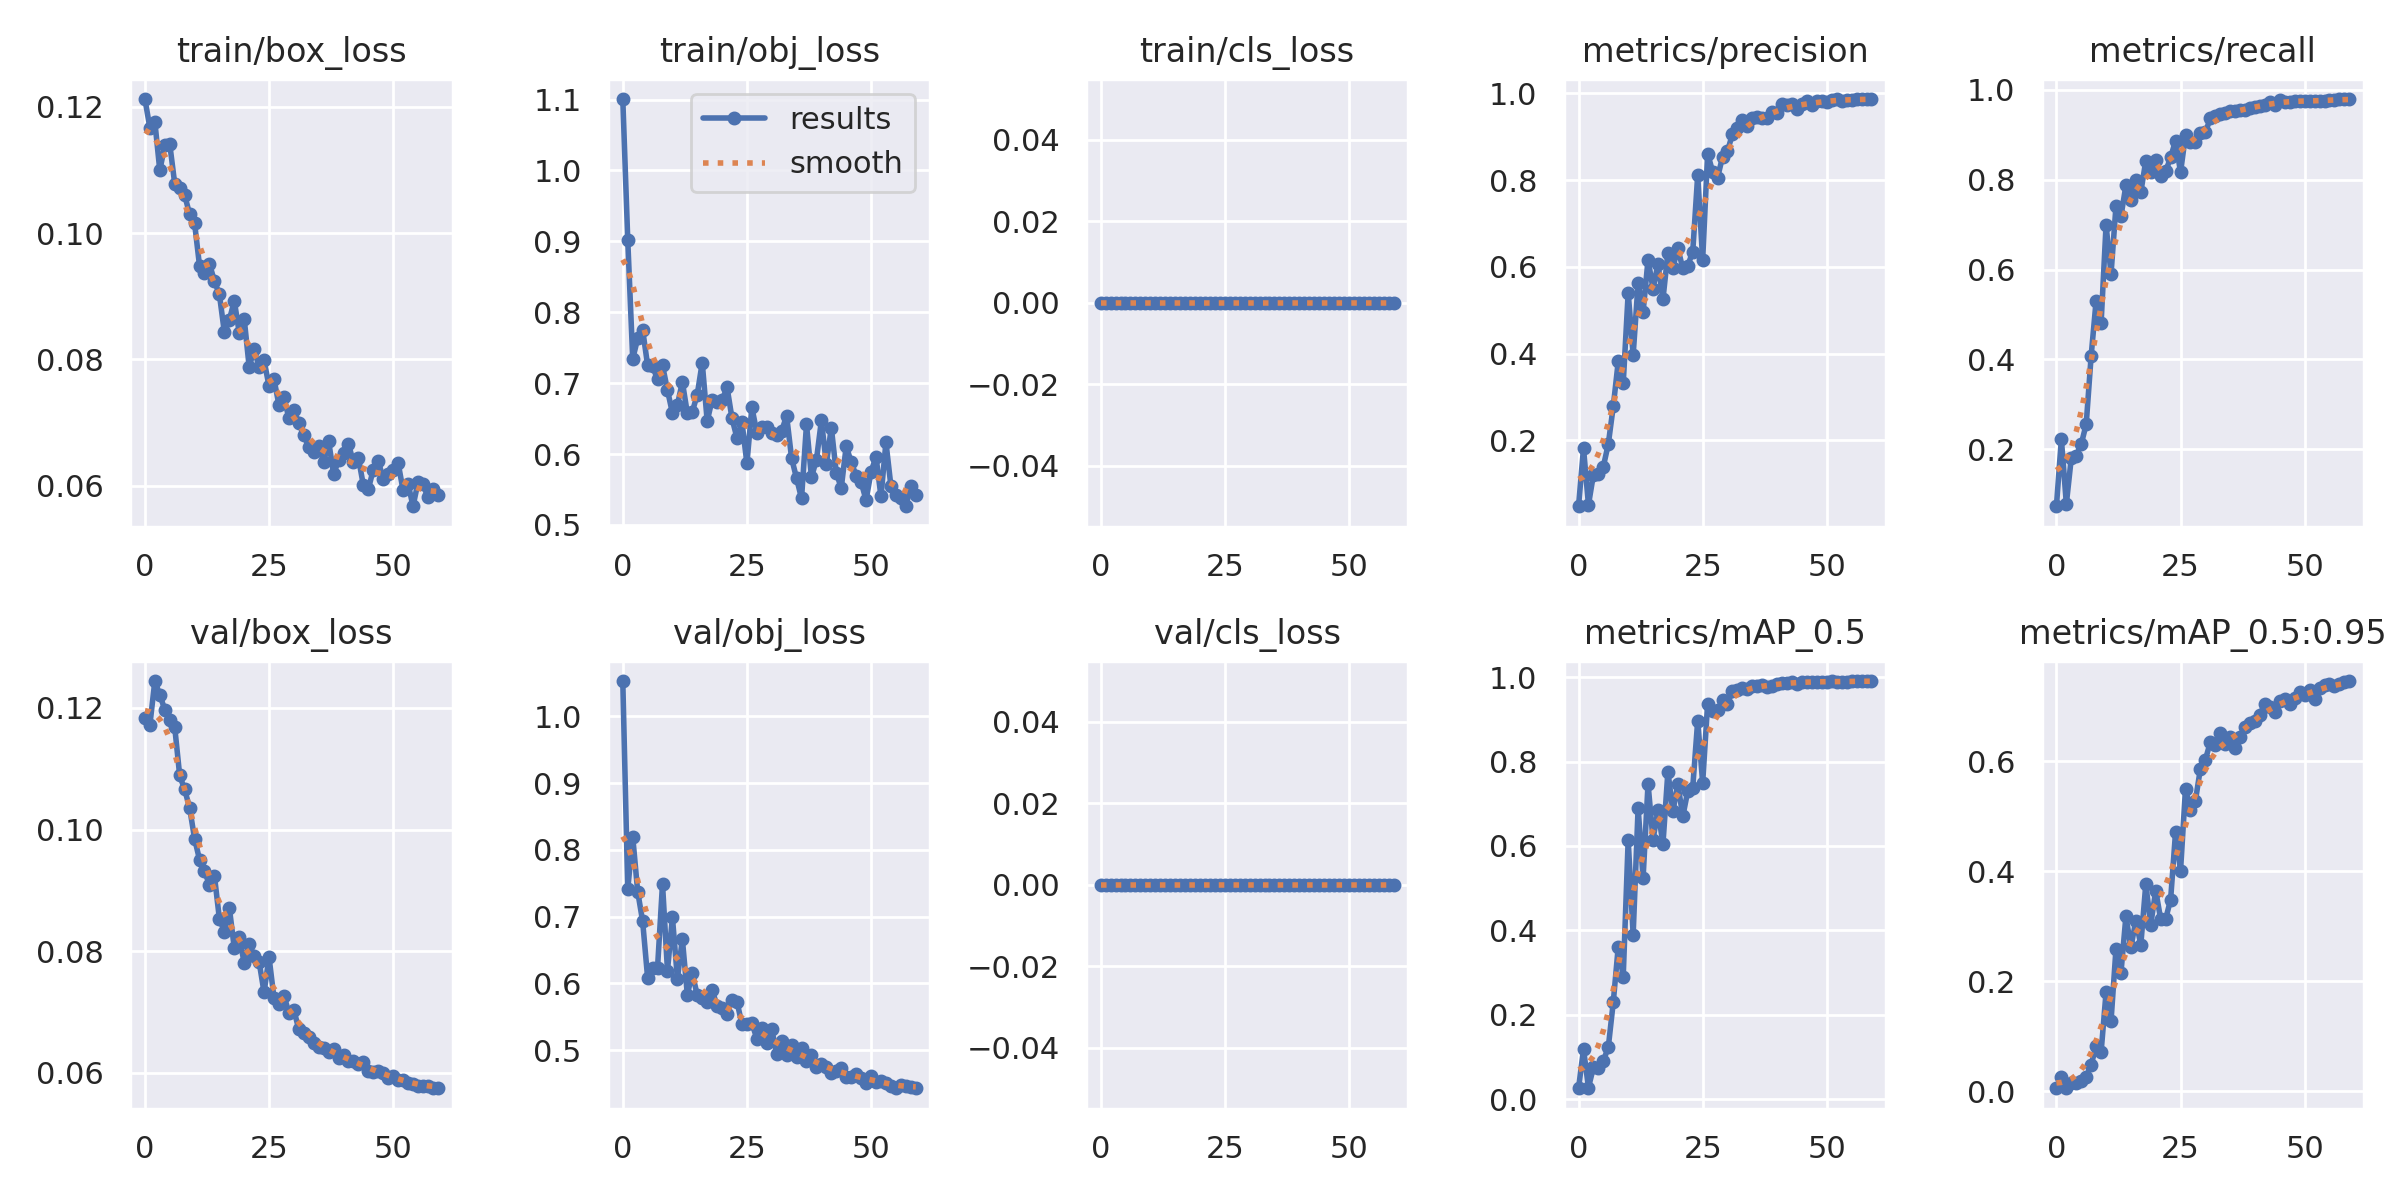

In [ ]:
print("Train result of YOLOv5l:")
Image(filename='/content/yolov5/runs/train/yolov5l/results.png', width=1280)

Train result of YOLOv5x:


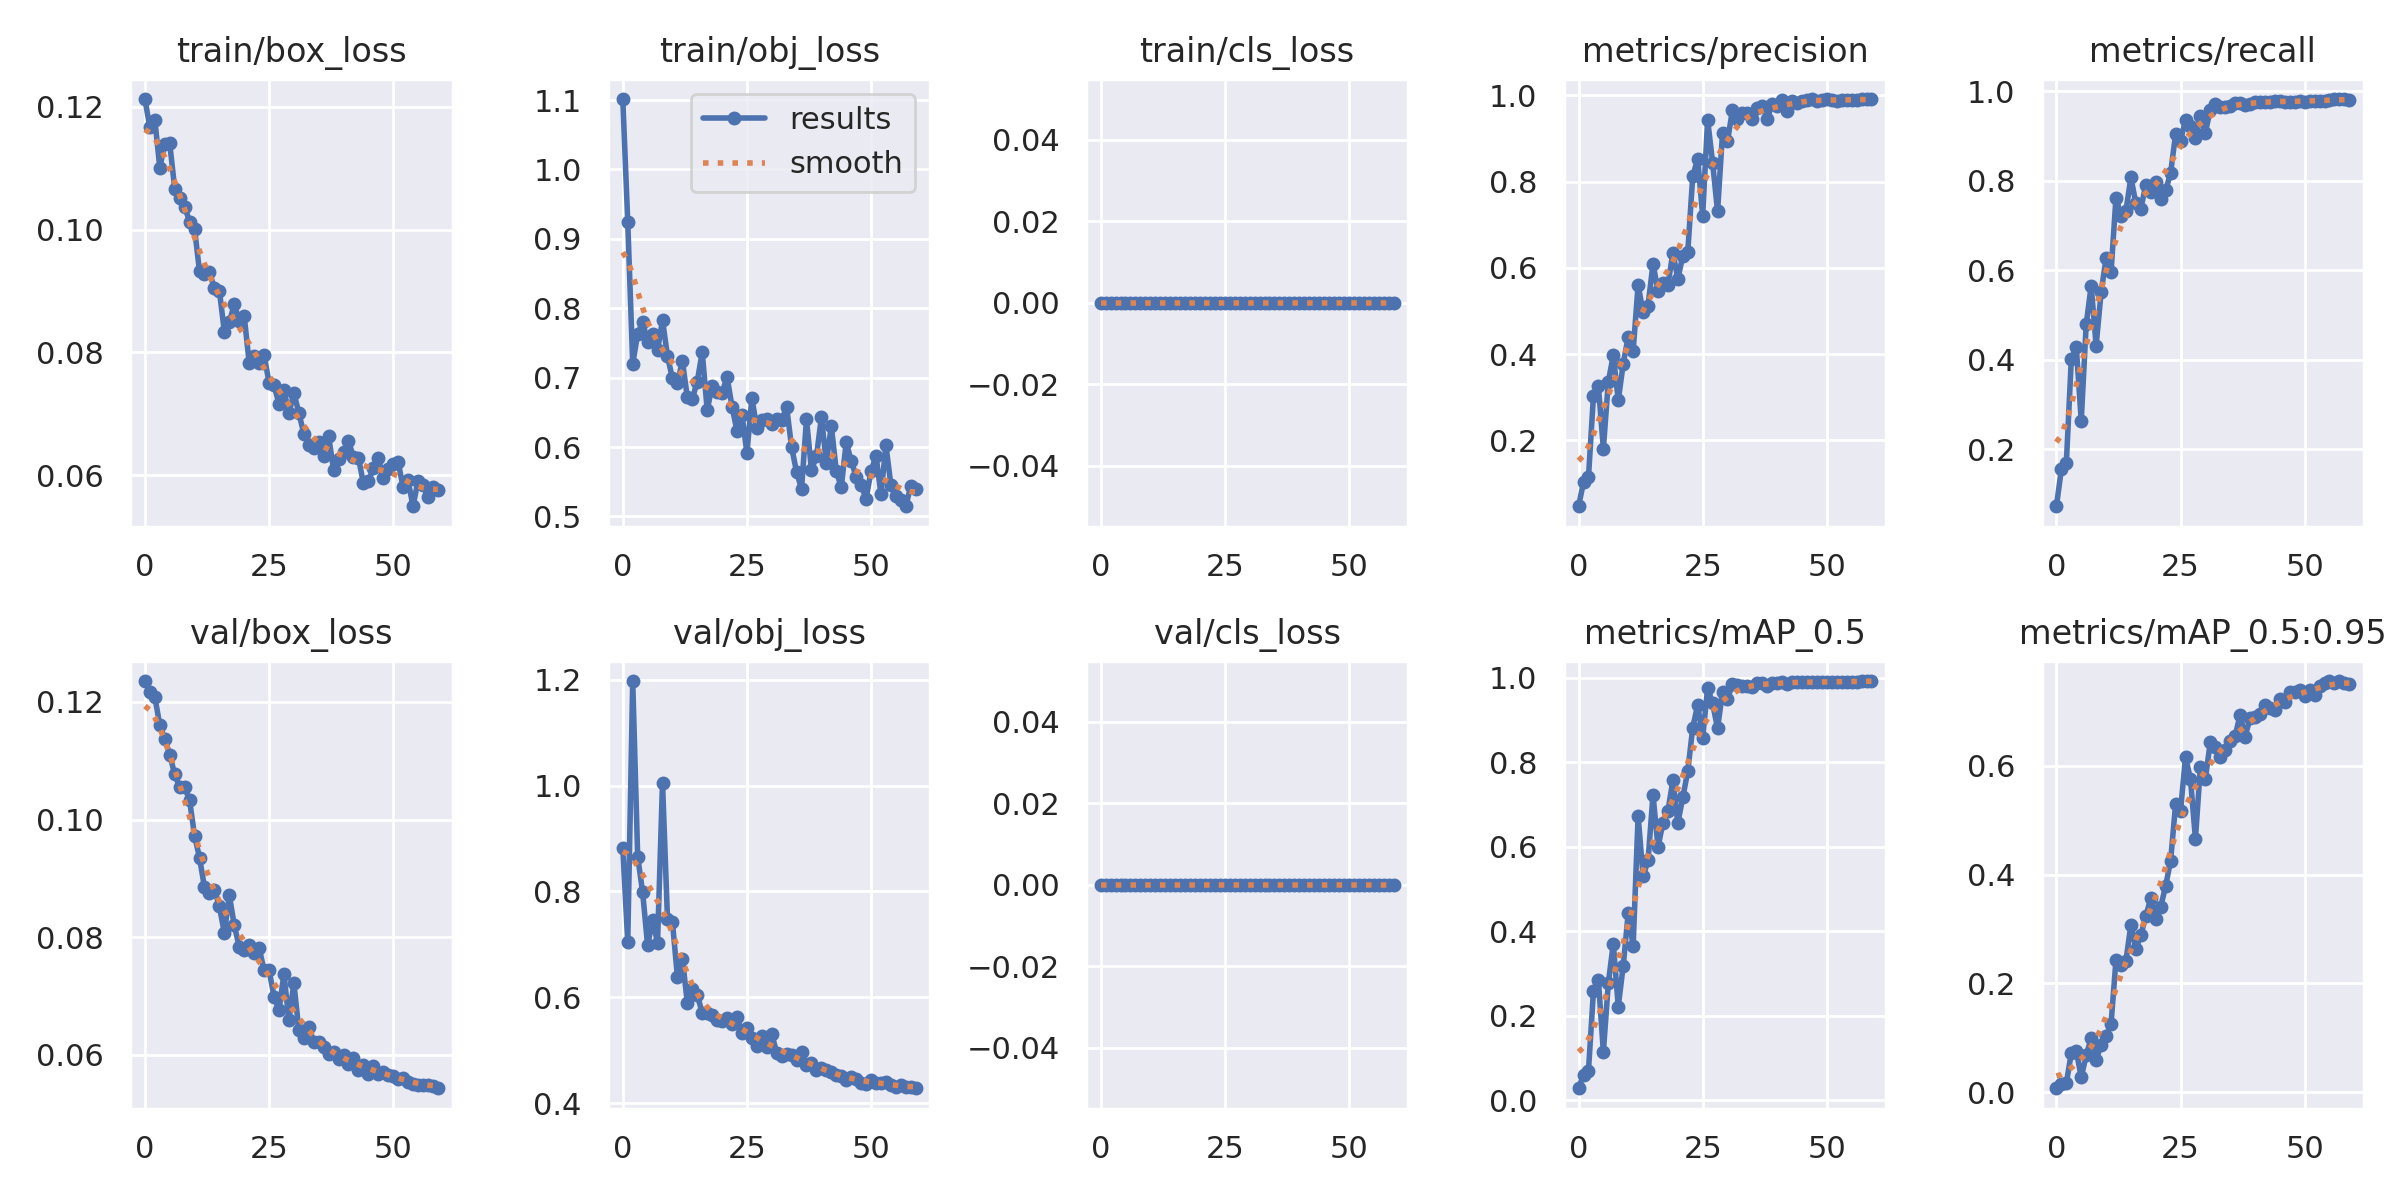

In [ ]:
print("Train result of YOLOv5x:")
Image(filename='/content/yolov5/runs/train/yolov5x/results.png', width=1280)

# Prediction

In [ ]:
# yolov5l
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/yolov5l/weights/best.pt \
    --img 800 --conf 0.6 \
    --source /content/wb_localization_dataset/images/test --line-thickness 1 --hide-labels --hide-conf --save-txt --save-conf --save-crop

detect: weights=['/content/yolov5/runs/train/yolov5l/weights/best.pt'], source=/content/wb_localization_dataset/images/test, data=yolov5/data/coco128.yaml, imgsz=[800, 800], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-005.jpg: 800x544 155 s, 75.6ms
image 2/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-006.jpg: 800x544 157 s, 48.0ms
image 3/214 /content/wb_locali

In [ ]:
# yolov5x
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/yolov5x/weights/best.pt \
    --img 800 --conf 0.6 \
    --source /content/wb_localization_dataset/images/test --line-thickness 1 --hide-labels --hide-conf --save-txt --save-conf --save-crop

detect: weights=['/content/yolov5/runs/train/yolov5x/weights/best.pt'], source=/content/wb_localization_dataset/images/test, data=yolov5/data/coco128.yaml, imgsz=[800, 800], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
image 1/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-005.jpg: 800x544 152 s, 76.5ms
image 2/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-006.jpg: 800x544 151 s, 61.4ms
image 3/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-008

In [ ]:
import glob

for imageName in glob.glob('runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# Validation

In [ ]:
# yolov5l
!python /content/yolov5/val.py --data custom_data.yaml --weights /content/yolov5/runs/train/yolov5l/weights/best.pt --img 800 --iou 0.6 --half

val: data=custom_data.yaml, weights=['/content/yolov5/runs/train/yolov5l/weights/best.pt'], batch_size=32, imgsz=800, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
val: Scanning /content/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances          P          R   

In [ ]:
# yolov5x
!python /content/yolov5/val.py --data custom_data.yaml --weights /content/yolov5/runs/train/yolov5x/weights/best.pt --img 800 --iou 0.6 --half

val: data=custom_data.yaml, weights=['/content/yolov5/runs/train/yolov5x/weights/best.pt'], batch_size=32, imgsz=800, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
val: Scanning /content/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances          P          R   

# Save results to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change path to avoid error and override
!mkdir '/content/drive/MyDrive/ColabNotebooks/trained_model/results'
!cp -r /content/yolov5/runs /content/drive/MyDrive/ColabNotebooks/trained_model/results

Download result folder

In [ ]:
from google.colab import files
files.download("/content/yolov5/runs")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>